In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Load the dataset
df = pd.read_csv('/content/cardio_train.csv', delimiter=';')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Generate random bias factors based on 'age' and 'gender'
age_bias_factor = np.random.uniform(0.8, 1.2, size=len(df))  # Random bias factors for age
gender_bias_factor = df['gender'].map({0: 0.9, 1: 1.1})  # Assign bias factors based on gender (0 for male, 1 for female)


In [40]:
# Combine bias factors
bias_factors = age_bias_factor * gender_bias_factor

# Define initial parameters
total_population = len(df)
initial_confirmed = 10  # Assuming 10 individuals are initially confirmed as cases
initial_infected = 20  # Assuming 20 individuals are initially infected or affected by disparities


In [41]:
# Define SCIR model parameters
base_beta = 0.3  # Base transmission rate
base_gamma_infected = 0.1  # Base recovery rate for infected individuals
base_gamma_confirmed = 0.05  # Base recovery rate for confirmed cases

# Initialize compartments
S = total_population - initial_confirmed - initial_infected
C = initial_confirmed
I = initial_infected
R = 0


In [42]:
# Lists to store simulation results
susceptible_list = [S]
confirmed_list = [C]
infected_list = [I]
recovered_list = [R]

In [43]:
# Simulation time steps
num_steps = 100

# Run the simulation
for step in range(num_steps):
    # Calculate bias-adjusted parameters based on generated bias factors
    adjusted_beta = base_beta * (1 - bias_factors.mean())  # Adjust beta based on average bias factor
    adjusted_gamma_infected = base_gamma_infected * (1 + bias_factors.std())  # Adjust gamma for infected based on bias variability
    adjusted_gamma_confirmed = base_gamma_confirmed  # No adjustment for confirmed cases

    new_infections = adjusted_beta * S * I / total_population
    new_confirmations = adjusted_gamma_infected * I
    new_recoveries_infected = adjusted_gamma_infected * I
    new_recoveries_confirmed = adjusted_gamma_confirmed * C

    S -= new_infections
    C += new_confirmations - new_recoveries_confirmed
    I += new_infections - new_recoveries_infected
    R += new_recoveries_infected + new_recoveries_confirmed

    susceptible_list.append(S)
    confirmed_list.append(C)
    infected_list.append(I)
    recovered_list.append(R)


In [44]:
# Calculate final metrics with error handling
total_cases = initial_confirmed + initial_infected
total_recoveries = recovered_list[-1] if recovered_list[-1] > 0 else 1  # Avoid division by zero
recovery_rate = total_recoveries / total_cases if total_cases > 0 else 0
bias_impact = adjusted_beta / base_beta if base_beta != 0 else 0  # Avoid division by zero

# Display results
print(f'Total Cases: {total_cases}')
print(f'Total Recoveries: {total_recoveries}')
print(f'Recovery Rate: {recovery_rate:.2f}')
print(f'Bias Impact on Transmission Rate: {bias_impact:.2f}')

Total Cases: 30
Total Recoveries: 41.38332550696462
Recovery Rate: 1.38
Bias Impact on Transmission Rate: -0.10


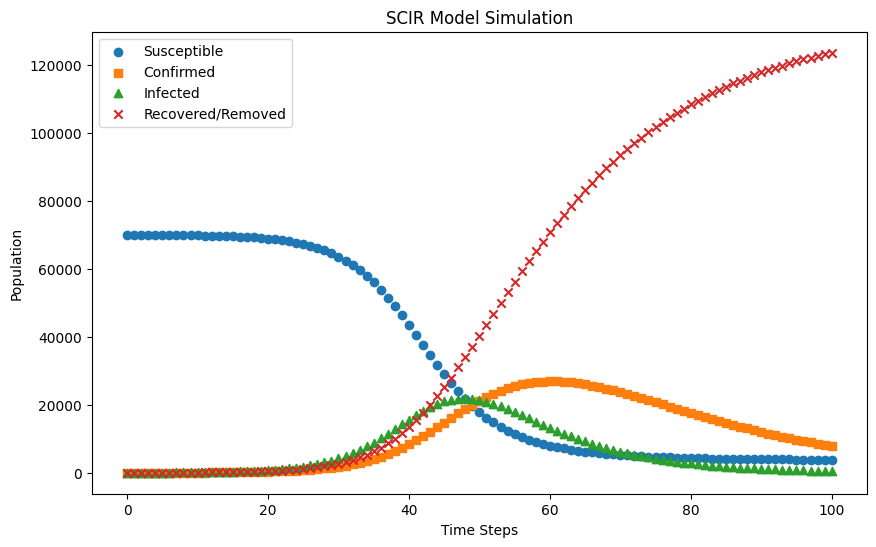

In [49]:
# Define initial parameters
total_population = len(df)
initial_confirmed = 10  # Assuming 10 individuals are initially confirmed as cases
initial_infected = 20  # Assuming 20 individuals are initially infected or affected by disparities

# Define SCIR model parameters
beta = 0.3  # Transmission rate
gamma_infected = 0.1  # Recovery rate for infected individuals
gamma_confirmed = 0.05  # Recovery rate for confirmed cases

# Initialize compartments
S = total_population - initial_confirmed - initial_infected
C = initial_confirmed
I = initial_infected
R = 0

# Lists to store simulation results
susceptible_list = [S]
confirmed_list = [C]
infected_list = [I]
recovered_list = [R]

# Simulation time steps
num_steps = 100

# Run the simulation
for step in range(num_steps):
    new_infections = beta * S * I / total_population
    new_confirmations = gamma_infected * I
    new_recoveries_infected = gamma_infected * I
    new_recoveries_confirmed = gamma_confirmed * C

    S -= new_infections
    C += new_confirmations - new_recoveries_confirmed
    I += new_infections - new_recoveries_infected
    R += new_recoveries_infected + new_recoveries_confirmed

    susceptible_list.append(S)
    confirmed_list.append(C)
    infected_list.append(I)
    recovered_list.append(R)

# Plotting the results as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(num_steps + 1), susceptible_list, label='Susceptible', marker='o')
plt.scatter(range(num_steps + 1), confirmed_list, label='Confirmed', marker='s')
plt.scatter(range(num_steps + 1), infected_list, label='Infected', marker='^')
plt.scatter(range(num_steps + 1), recovered_list, label='Recovered/Removed', marker='x')
plt.xlabel('Time Steps')
plt.ylabel('Population')
plt.title('SCIR Model Simulation')
plt.legend()
plt.show()
